<h1>1.Imports</h1>


In [177]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from math import ceil
import requests
from PIL import Image
from io import BytesIO


In [178]:
df = pd.read_csv('fitzpatrick17k.csv')
df

,md5hash,fitzpatrick_scale,fitzpatrick_centaur,label,nine_partition_label,three_partition_label,qc,url,url_alphanum
0,5e82a45bc5d78bd24ae9202d194423f8,3,3,drug induced pigmentary changes,inflammatory,non-neoplastic,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicmminoc...
1,fa2911a9b13b6f8af79cb700937cc14f,1,1,photodermatoses,inflammatory,non-neoplastic,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicpphoto...
2,d2bac3c9e4499032ca8e9b07c7d3bc40,2,3,dermatofibroma,benign dermal,benign,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicdderma...
3,0a94359e7eaacd7178e06b2823777789,1,1,psoriasis,inflammatory,non-neoplastic,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicppsori...
4,a39ec3b1f22c08a421fa20535e037bba,1,1,psoriasis,inflammatory,non-neoplastic,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicppsori...
...,...,...,...,...,...,...,...,...,...
16572,cd90e491ddaa92f0f4eb07f73aa09f64,5,5,scleroderma,inflammatory,non-neoplastic,NaN,http://atlasdermatologico.com.br/img?imageId=4529,httpwwwatlasdermatologicocombrimgimageId4529.jpg
16573,5f1ed6de6a9110d7dc580a6a0312af63,4,5,pityriasis rosea,inflammatory,non-neoplastic,NaN,http://atlasdermatologico.com.br/img?imageId=5630,httpwwwatlasdermatologicocombrimgimageId5630.jpg
16574,f198aaf1f0550c2464b285454d34926e,3,3,myiasis,inflammatory,non-neoplastic,NaN,http://atlasdermatologico.com.br/img?imageId=4609,httpwwwatlasdermatologicocombrimgimageId4609.jpg
16575,6214de2e915835014235a1839cbc5938,-1,5,vitiligo,inflammatory,non-neoplastic,NaN,http://atlasdermatologico.com.br/img?imageId=7930,httpwwwatlasdermatologicocombrimgimageId7930.jpg


<h1>2.Data Exploration</h1>


In [179]:
df.head()

,md5hash,fitzpatrick_scale,fitzpatrick_centaur,label,nine_partition_label,three_partition_label,qc,url,url_alphanum
0,5e82a45bc5d78bd24ae9202d194423f8,3,3,drug induced pigmentary changes,inflammatory,non-neoplastic,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicmminoc...
1,fa2911a9b13b6f8af79cb700937cc14f,1,1,photodermatoses,inflammatory,non-neoplastic,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicpphoto...
2,d2bac3c9e4499032ca8e9b07c7d3bc40,2,3,dermatofibroma,benign dermal,benign,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicdderma...
3,0a94359e7eaacd7178e06b2823777789,1,1,psoriasis,inflammatory,non-neoplastic,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicppsori...
4,a39ec3b1f22c08a421fa20535e037bba,1,1,psoriasis,inflammatory,non-neoplastic,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicppsori...


In [180]:
print("This data set has",df.shape[1],"columns and", df.shape[0],"rows")

This data set has 9 columns and 16577 rows


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16577 entries, 0 to 16576
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   md5hash                16577 non-null  object
 1   fitzpatrick_scale      16577 non-null  int64 
 2   fitzpatrick_centaur    16577 non-null  int64 
 3   label                  16577 non-null  object
 4   nine_partition_label   16577 non-null  object
 5   three_partition_label  16577 non-null  object
 6   qc                     504 non-null    object
 7   url                    16536 non-null  object
 8   url_alphanum           16577 non-null  object
dtypes: int64(2), object(7)
memory usage: 1.1+ MB


In [182]:
df.describe(include ='int64').T

,count,mean,std,min,25%,50%,75%,max
fitzpatrick_scale,16577.0,2.685709,1.526522,-1.0,2.0,2.0,4.0,6.0
fitzpatrick_centaur,16577.0,2.255113,1.658569,-1.0,1.0,2.0,3.0,6.0


In [183]:
df.describe(include="object").T

,count,unique,top,freq
md5hash,16577,16577,5e82a45bc5d78bd24ae9202d194423f8,1
label,16577,114,psoriasis,653
nine_partition_label,16577,9,inflammatory,10886
three_partition_label,16577,3,non-neoplastic,12080
qc,504,5,1 Diagnostic,348
url,16536,16536,https://www.dermaamin.com/site/images/clinical...,1
url_alphanum,16577,16577,httpwwwdermaamincomsiteimagesclinicalpicmminoc...,1


In [184]:
df.duplicated().sum() 

0

In [185]:
df.columns

Index(['md5hash', 'fitzpatrick_scale', 'fitzpatrick_centaur', 'label',
       'nine_partition_label', 'three_partition_label', 'qc', 'url',
       'url_alphanum'],
      dtype='object')

<h1>3.Data Preparation</h1>


In [186]:
df = df.reset_index().rename(columns={'index': 'ID'}).set_index('ID')

In [187]:
df.drop("md5hash", axis=1, inplace=True)

In [188]:
df.head()

,fitzpatrick_scale,fitzpatrick_centaur,label,nine_partition_label,three_partition_label,qc,url,url_alphanum
ID,,,,,,,,
0,3,3,drug induced pigmentary changes,inflammatory,non-neoplastic,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicmminoc...
1,1,1,photodermatoses,inflammatory,non-neoplastic,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicpphoto...
2,2,3,dermatofibroma,benign dermal,benign,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicdderma...
3,1,1,psoriasis,inflammatory,non-neoplastic,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicppsori...
4,1,1,psoriasis,inflammatory,non-neoplastic,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicppsori...


In [189]:
df.columns

Index(['fitzpatrick_scale', 'fitzpatrick_centaur', 'label',
       'nine_partition_label', 'three_partition_label', 'qc', 'url',
       'url_alphanum'],
      dtype='object')

In [190]:
#Type I: Very fair skin that always burns and never tans (pale or ivory skin).
#Type II: Fair skin that burns easily and tans minimally (fair or light skin).
#Type III: Skin that burns moderately and tans gradually to a light brown color (medium or olive skin).
#Type IV: Skin that burns minimally and tans well to a moderate brown color (medium to dark brown skin).
#Type V: Skin that rarely burns and tans profusely to a dark brown color (dark brown skin).
#Type VI: Skin that never burns and tans very easily to a deep, dark brown or black color (deeply pigmented or black skin).
df["fitzpatrick_scale"].value_counts()

fitzpatrick_scale
 2    4808
 3    3308
 1    2947
 4    2781
 5    1533
 6     635
-1     565
Name: count, dtype: int64

In [191]:
df["fitzpatrick_centaur"].value_counts()

fitzpatrick_centaur
 1    5561
 2    3180
 3    2934
 4    1974
 5    1293
-1    1073
 6     562
Name: count, dtype: int64

In [192]:
#Target
df["label"].value_counts()

label
psoriasis                      653
squamous cell carcinoma        581
lichen planus                  491
basal cell carcinoma           468
allergic contact dermatitis    430
                              ... 
port wine stain                 59
erythema elevatum diutinum      55
pustular psoriasis              53
xanthomas                       53
pilomatricoma                   53
Name: count, Length: 114, dtype: int64

In [193]:
#categories represent different types of skin conditions or diseases
df["nine_partition_label"].value_counts()

nine_partition_label
inflammatory                    10886
malignant epidermal              1352
genodermatoses                   1194
benign dermal                    1067
benign epidermal                  931
malignant melanoma                573
benign melanocyte                 236
malignant cutaneous lymphoma      182
malignant dermal                  156
Name: count, dtype: int64

In [194]:
df.rename(columns={'nine_partition_label': 'disease_category'}, inplace=True)

In [195]:
# categorize skin conditions into three broad groups based on whether they are non-cancerous (benign or non-neoplastic) or cancerous (malignant).
df["three_partition_label"].value_counts()

three_partition_label
non-neoplastic    12080
malignant          2263
benign             2234
Name: count, dtype: int64

In [196]:
df.rename(columns={'three_partition_label': 'disease_type'}, inplace=True)

In [197]:
# "qc" appears to describe quality control measures
df["qc"].value_counts()

qc
1 Diagnostic          348
5 Potentially          97
2 Characteristic       32
3 Wrongly labelled     17
4 Other                10
Name: count, dtype: int64

In [198]:
df.rename(columns={'qc': 'quality_control'}, inplace=True)

<h2>3.1 Treating Missing/Strange Values </h2>

In [199]:
# Check all missing values
missing_values = df.isna().sum()

# Calculate the percentage of missing values
percentage_missing = (missing_values / df.shape[0]) * 100

# Combine the results into a new DataFrame for better readability
missing_data_summary = pd.DataFrame({
    'Variable': missing_values.index,
    'Missing Values': missing_values.values,
    'Percentage Missing': percentage_missing.values
})

# Display the summary
print(missing_data_summary)

              Variable  Missing Values  Percentage Missing
0    fitzpatrick_scale               0            0.000000
1  fitzpatrick_centaur               0            0.000000
2                label               0            0.000000
3     disease_category               0            0.000000
4         disease_type               0            0.000000
5      quality_control           16073           96.959643
6                  url              41            0.247331
7         url_alphanum               0            0.000000


<h4> Quality Control </h4>
__________________________________________________________

In [200]:
# Define a dictionary mapping incorrect values to correct values
corrections = {
    '1 Diagnostic': 'Diagnostic',
    '5 Potentially': 'Potentially',
    '2 Characteristic': 'Characteristic',
    '3 Wrongly labelled': 'Wrongly labelled',
    '4 Other': 'Other'
}

# Apply the corrections to the 'qc' column
df['quality_control'] = df['quality_control'].map(corrections)


<h4> Url Alphanum </h4>
__________________________________________________________

In [201]:

df[df["url"].isnull()]

,fitzpatrick_scale,fitzpatrick_centaur,label,disease_category,disease_type,quality_control,url,url_alphanum
ID,,,,,,,,
145,3,4,lichen simplex,inflammatory,non-neoplastic,NaN,NaN,httpwwwdermaamincomsiteimagesclinicalpicLLiche...
349,5,-1,melanoma,malignant melanoma,malignant,NaN,NaN,httpwwwdermaamincomsiteimagesclinicalpicooralm...
535,3,3,lichen simplex,inflammatory,non-neoplastic,NaN,NaN,httpwwwdermaamincomsiteimagesclinicalpicLLiche...
868,4,1,lichen simplex,inflammatory,non-neoplastic,NaN,NaN,httpwwwdermaamincomsiteimagesclinicalpicLLiche...
879,6,6,melanoma,malignant melanoma,malignant,NaN,NaN,httpwwwdermaamincomsiteimagesclinicalpicooralm...
918,2,2,lichen simplex,inflammatory,non-neoplastic,NaN,NaN,httpwwwdermaamincomsiteimagesclinicalpicLLiche...
1322,3,3,lichen simplex,inflammatory,non-neoplastic,NaN,NaN,httpwwwdermaamincomsiteimagesclinicalpicLLiche...
1958,1,-1,nevocytic nevus,benign melanocyte,benign,NaN,NaN,httpwwwdermaamincomsiteimageshistopicjjunction...
1972,2,2,lichen simplex,inflammatory,non-neoplastic,NaN,NaN,httpwwwdermaamincomsiteimagesclinicalpicLLiche...


In [202]:
df[df["fitzpatrick_scale"]==-1]

,fitzpatrick_scale,fitzpatrick_centaur,label,disease_category,disease_type,quality_control,url,url_alphanum
ID,,,,,,,,
10,-1,-1,necrobiosis lipoidica,inflammatory,non-neoplastic,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicnnecro...
35,-1,-1,pediculosis lids,inflammatory,non-neoplastic,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicppedic...
57,-1,1,scleroderma,inflammatory,non-neoplastic,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicsscler...
64,-1,1,dermatofibroma,benign dermal,benign,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicdderma...
95,-1,2,pustular psoriasis,inflammatory,non-neoplastic,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicppustu...
...,...,...,...,...,...,...,...,...
16513,-1,-1,myiasis,inflammatory,non-neoplastic,NaN,http://atlasdermatologico.com.br/img?imageId=4640,httpwwwatlasdermatologicocombrimgimageId4640.jpg
16515,-1,-1,myiasis,inflammatory,non-neoplastic,NaN,http://atlasdermatologico.com.br/img?imageId=4606,httpwwwatlasdermatologicocombrimgimageId4606.jpg
16522,-1,-1,myiasis,inflammatory,non-neoplastic,NaN,http://atlasdermatologico.com.br/img?imageId=4616,httpwwwatlasdermatologicocombrimgimageId4616.jpg


In [203]:
df.head()

,fitzpatrick_scale,fitzpatrick_centaur,label,disease_category,disease_type,quality_control,url,url_alphanum
ID,,,,,,,,
0,3,3,drug induced pigmentary changes,inflammatory,non-neoplastic,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicmminoc...
1,1,1,photodermatoses,inflammatory,non-neoplastic,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicpphoto...
2,2,3,dermatofibroma,benign dermal,benign,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicdderma...
3,1,1,psoriasis,inflammatory,non-neoplastic,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicppsori...
4,1,1,psoriasis,inflammatory,non-neoplastic,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicppsori...


<h2>3.2 Some Data Visualization </h2>

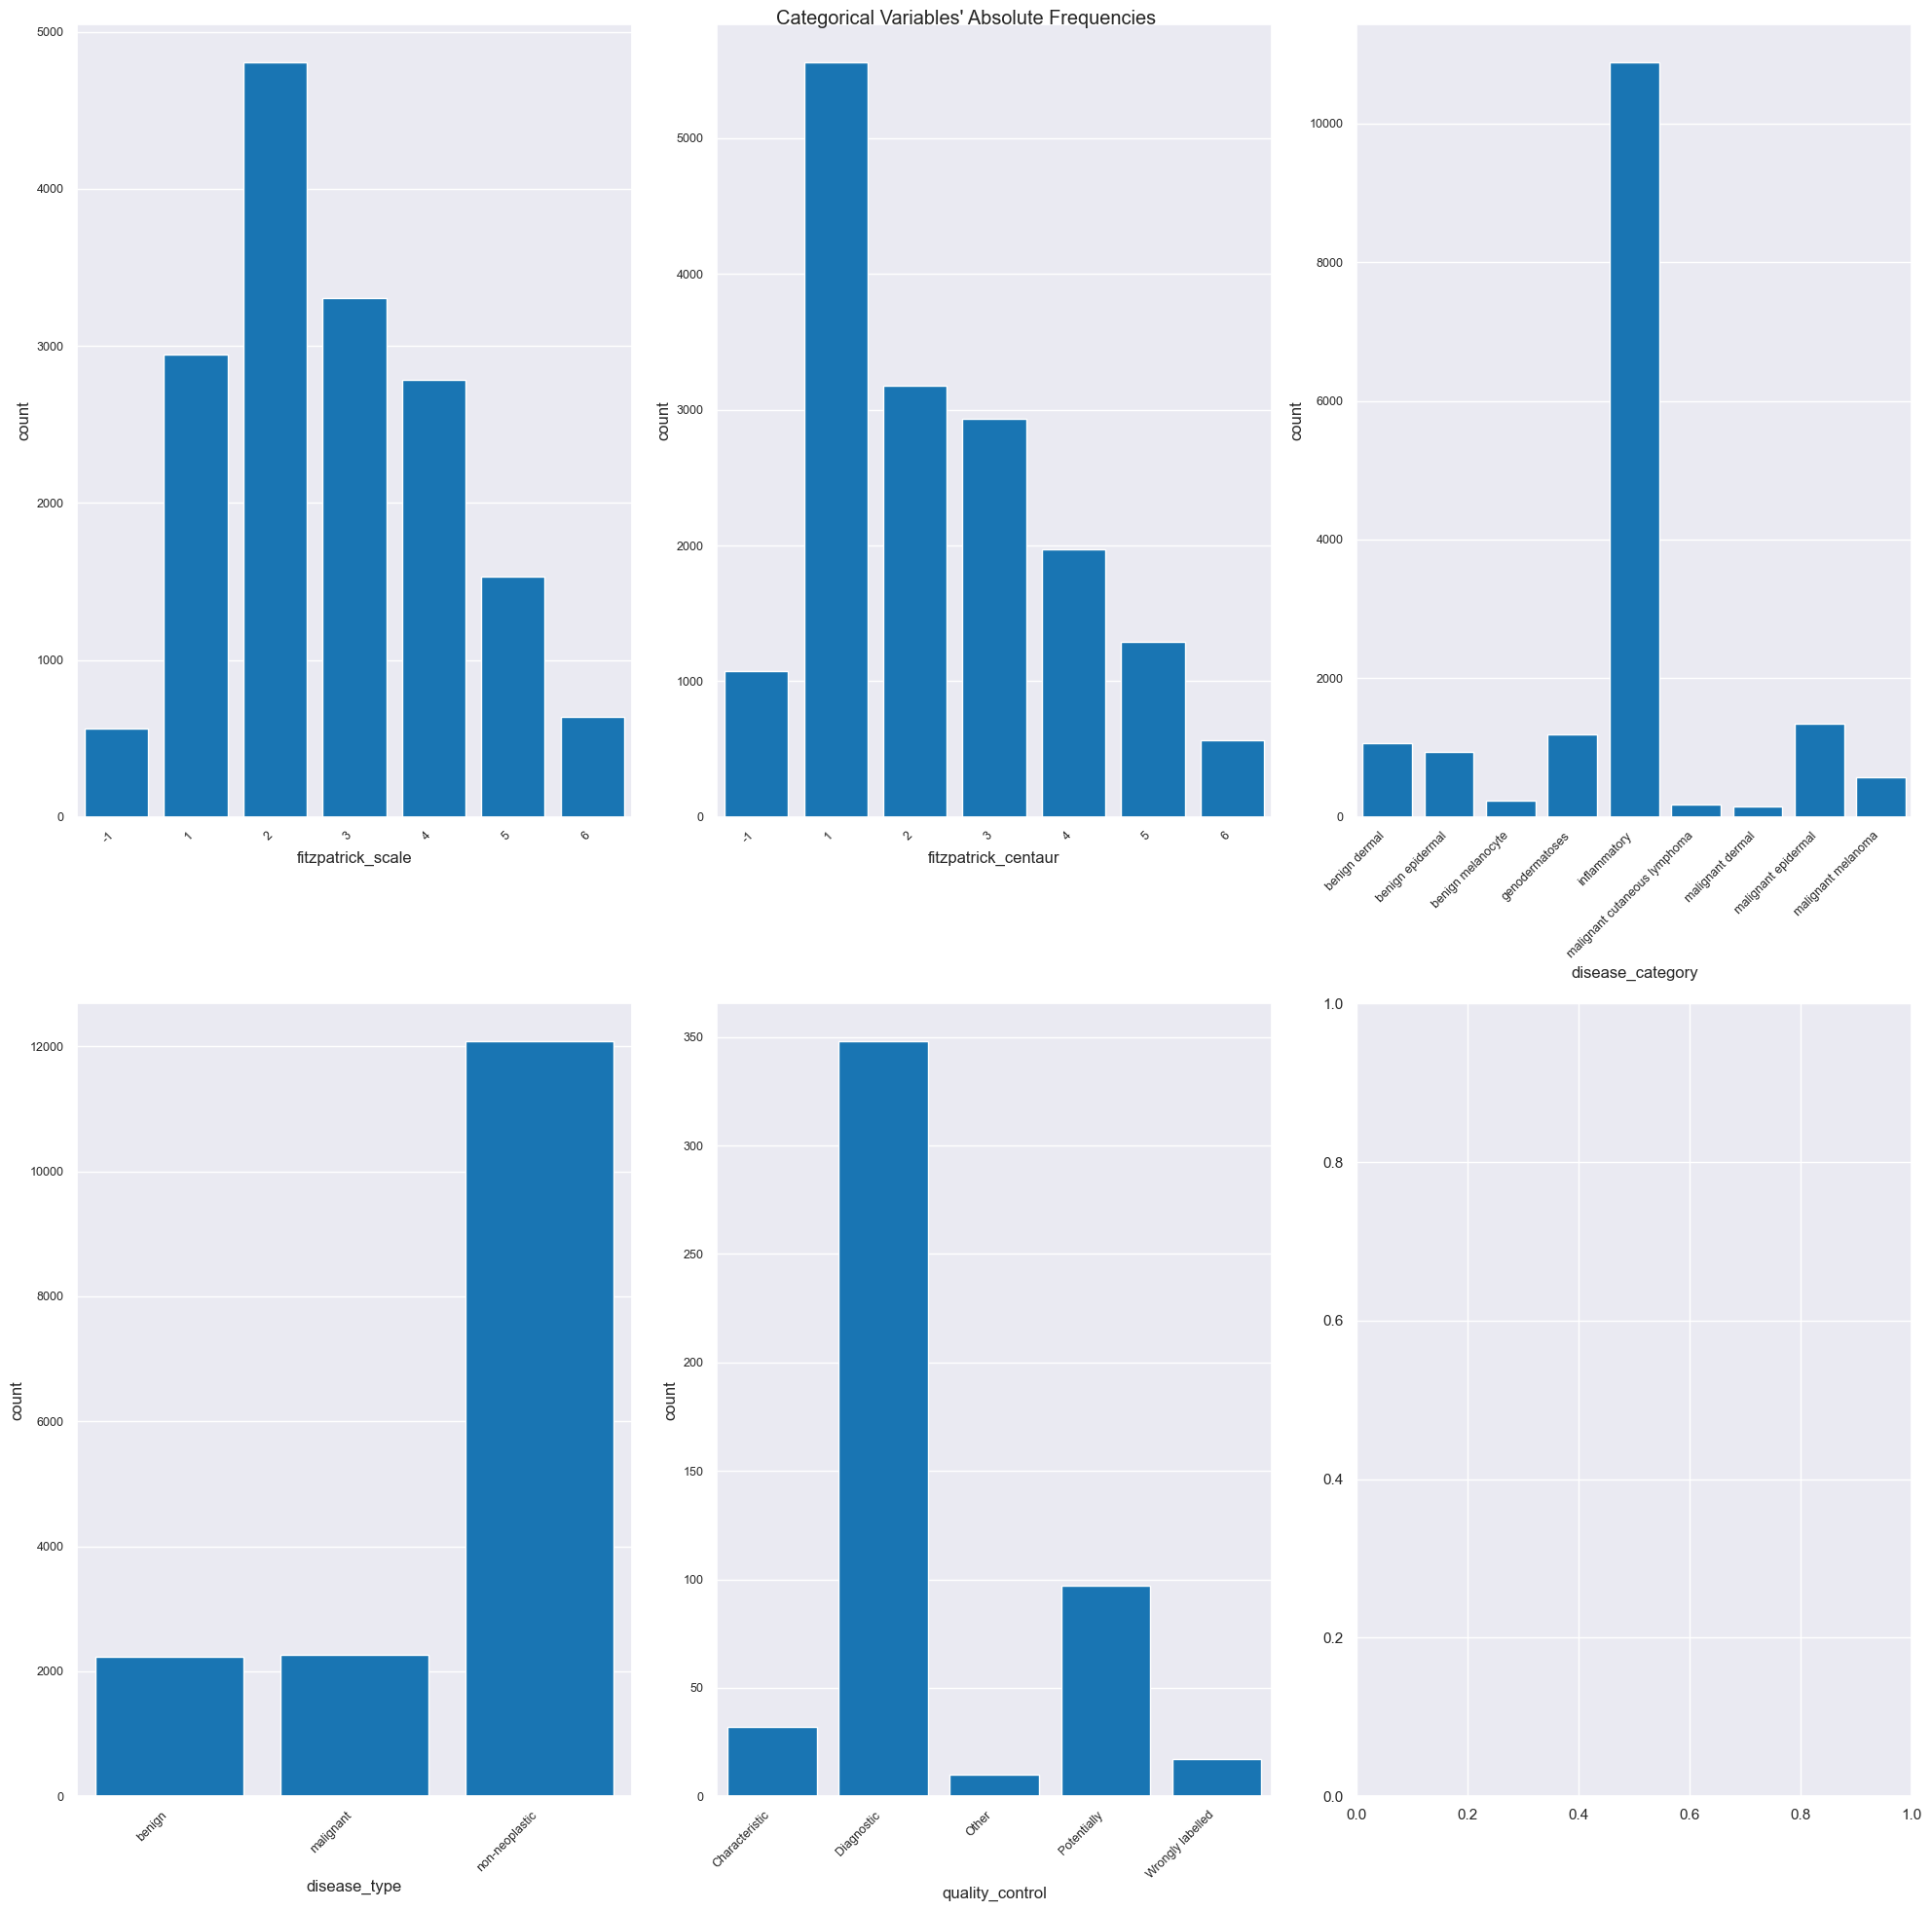

In [204]:
columns_to_visualize =["fitzpatrick_scale","fitzpatrick_centaur","disease_category","disease_type","quality_control"]
# All Non-Metric Variables' Absolute Frequencies
sns.set()

# Prepare figure. Create individual axes where each bar plot will be placed
fig, axes = plt.subplots(2, ceil(len(columns_to_visualize) / 2), figsize=(20, 20))

# Plot data
# Iterate across axes objects and associate each bar plot:
for ax, feat in zip(axes.flatten(), columns_to_visualize):
    order = df[feat].value_counts().sort_index().index
    sns.countplot(x=df[feat].astype(object), ax=ax, color='#007acc', order=order)
    ax.tick_params(axis='x', labelsize=9)
    ax.tick_params(axis='y', labelsize=9)
    
    # Rotate x-axis labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

title = "Categorical Variables' Absolute Frequencies"
plt.suptitle(title)
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


- fix the missing urls using url_alphanum and then drop url_alphanum
- Figure out what does fitzpatrick_centaur mean 
- the -1 values in fitzpatrick_scale and fitzpatrick_centaur mean 

In [205]:
# Function to download and resize images
def resize_image(url, target_size=(224, 224)):
    try:
        response = requests.get(url)
        print("Response Headers:", response.headers)
        print("Response Content:", response.content)
        
        # Check if response contains valid image content
        if response.headers.get('content-type') and 'image' in response.headers.get('content-type'):
            img = Image.open(BytesIO(response.content))
            
            # Resize image
            img = img.resize(target_size)
            
            return img
        else:
            print(f"Error: Response does not contain a valid image file for URL: {url}")
            return None
    except Exception as e:
        print(f"Error resizing image from URL: {url}, Error: {e}")
        return None

# Apply resizing to each image URL in the DataFrame
df['resized_images'] = df['url'].apply(resize_image)

Response Headers: {'Date': 'Fri, 22 Mar 2024 21:19:15 GMT', 'Server': 'Apache', 'Content-Length': '226', 'Keep-Alive': 'timeout=5, max=75', 'Connection': 'Keep-Alive', 'Content-Type': 'text/html; charset=iso-8859-1'}
Response Content: b'<head><title>Not Acceptable!</title></head><body><h1>Not Acceptable!</h1><p>An appropriate representation of the requested resource could not be found on this server. This error was generated by Mod_Security.</p></body></html>'
Error: Response does not contain a valid image file for URL: https://www.dermaamin.com/site/images/clinical-pic/m/minocycline-pigmentation/minocycline-pigmentation1.jpg
Response Headers: {'Date': 'Fri, 22 Mar 2024 21:19:16 GMT', 'Server': 'Apache', 'Content-Length': '226', 'Keep-Alive': 'timeout=5, max=75', 'Connection': 'Keep-Alive', 'Content-Type': 'text/html; charset=iso-8859-1'}
Response Content: b'<head><title>Not Acceptable!</title></head><body><h1>Not Acceptable!</h1><p>An appropriate representation of the requested resour

KeyboardInterrupt: 